In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [21]:
df = pd.read_csv("heart_disease_uci.csv", header=None, na_values="?")


In [41]:
df.columns = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
    'restecg', 'thalach', 'exang', 'oldpeak',
    'slope', 'ca', 'thal', 'extra1', 'extra2', 'target'
]


(921, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 921 entries, 0 to 920
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       921 non-null    object
 1   sex       921 non-null    object
 2   cp        921 non-null    object
 3   trestbps  921 non-null    object
 4   chol      921 non-null    object
 5   fbs       862 non-null    object
 6   restecg   891 non-null    object
 7   thalach   831 non-null    object
 8   exang     919 non-null    object
 9   oldpeak   866 non-null    object
 10  slope     866 non-null    object
 11  ca        859 non-null    object
 12  thal      612 non-null    object
 13  extra1    310 non-null    object
 14  extra2    435 non-null    object
 15  target    921 non-null    object
dtypes: object(16)
memory usage: 115.3+ KB
None
age           0
sex           0
cp            0
trestbps      0
chol          0
fbs          59
restecg      30
thalach      90
exang         2
oldpeak  

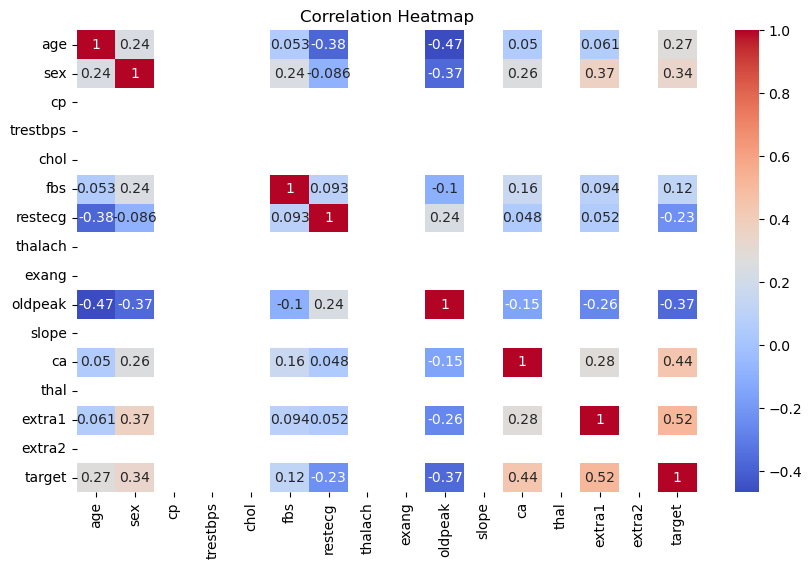

In [53]:
print(df.shape)
print(df.info())
print(df.isna().sum())
print("Duplicate rows:", df.duplicated().sum())

# Convert numeric-looking columns to numbers
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors="coerce")  # force conversion

# Drop non-numeric ID if present
df = df.drop(columns=["id"], errors="ignore")

# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

print("\nNumeric columns detected:", numeric_df.columns.tolist())

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


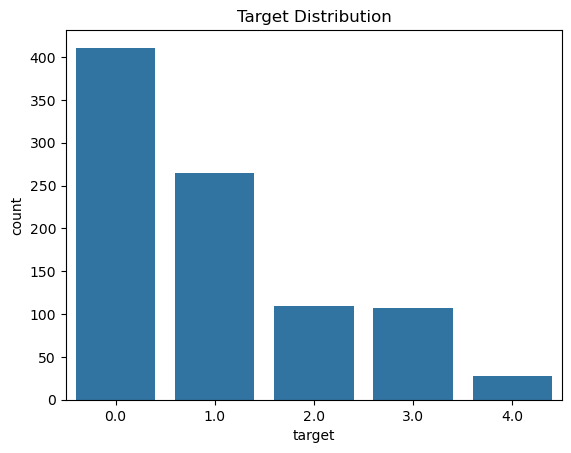

C:\Users\HP\AppData\Local\Temp\ipykernel_3980\1962277186.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [55]:
sns.countplot(x='target', data=df)
plt.title("Target Distribution")
plt.show()

for col in df.columns:
    if df[col].dtype == "object":
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

X = df.drop('target', axis=1)
y = df['target']
y = y.apply(lambda x: 1 if x > 0 else 0)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7837837837837838

Confusion Matrix:
 [[63 20]
 [20 82]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.76      0.76        83
           1       0.80      0.80      0.80       102

    accuracy                           0.78       185
   macro avg       0.78      0.78      0.78       185
weighted avg       0.78      0.78      0.78       185



D:\software\anaconda\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['cp' 'trestbps' 'chol' 'thalach' 'exang' 'slope' 'thal' 'extra2']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
D:\software\anaconda\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['cp' 'trestbps' 'chol' 'thalach' 'exang' 'slope' 'thal' 'extra2']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
